In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amex-parquet/test_data.parquet
/kaggle/input/amex-parquet/train_data.parquet


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from itertools import cycle

import warnings, gc
warnings.filterwarnings('ignore')

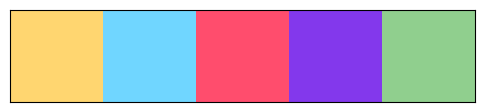

In [3]:
#Custom Color Palette 🎨
custom_colors = ["#ffd670","#70d6ff","#ff4d6d","#8338ec","#90cf8e"]
customPalette = sns.set_palette(sns.color_palette(custom_colors))
sns.palplot(sns.color_palette(custom_colors),size=1.2)
plt.tick_params(axis='both', labelsize=0, length = 0)

In [4]:
%%time
train = pd.read_parquet('../input/amex-parquet/train_data.parquet')

CPU times: user 13 s, sys: 17.5 s, total: 30.5 s
Wall time: 30.8 s


In [5]:
train.dtypes

customer_ID     object
S_2             object
P_2            float32
D_39           float32
B_1            float32
                ...   
D_142          float32
D_143          float32
D_144          float32
D_145          float32
target           int64
Length: 191, dtype: object

# Column Descriptions : 
## customer_ID = Unique Customer ID
## D_* = Delinquency variables:
To measure the past or present payment behavior of a borrower , and are typically represented as binary variables (0 or 1) indicating whether a borrower has made late payments or missed payments on their credit obligations.
 Example: 30 day delinquency, Default, Foreclosure.
## S_* = Spend variables:
To measure or predict consumer spending behavior. Example: Income, Age, Purchase History.

## P_* = Payment variables:
To measure or predict payment behavior. Example: Payment history, Payment method, Payment terms.
## B_* = Balance variables:
To measure or predict the balance of an account orfinancial transaction. Example: Account balance, Credit limit, Payment due date.
## R_* = Risk variables:
To measure or predict the level of risk associated with a particular activity or investment.
Example: Credit rating, Historical performance, Market conditions.

In [6]:
train.shape

(5531451, 191)

In [7]:
#Check for number of unique customers
len(train.customer_ID.unique())

458913

In [8]:
train.sample(5)   # preview  of dataset

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
2357913,6ce67ac530f92be1c4e71f35c6fbb260104e760ceb8f9d...,2017-06-16,0.507956,0.206949,0.011055,1.007536,0.000515,0.157533,0.208739,0.009422,...,NaN,NaN,0.004417,0.000332,0.008184,NaN,0.007190,0.004051,0.009978,1
5247954,f2b8cbc42ef468f800f28c14a58a3b356c41fa165149d8...,2017-11-12,0.993366,0.007192,0.010363,1.001799,0.007190,0.018965,0.007620,0.040590,...,NaN,NaN,0.008164,0.003541,0.006101,NaN,0.000888,0.002124,0.009578,0
3261033,96a9cd396744108a16400d5ecc302e6c5645ab93c46f82...,2017-09-03,0.634086,0.006594,0.009497,0.813465,0.004853,0.395696,0.002914,0.025675,...,NaN,NaN,1.006297,0.004061,1.020093,0.838575,1.006984,0.575497,0.278879,0
5490019,fe11ae9bfc9c53f838c9e1854af2efb1756d946ff7d9d8...,2018-03-23,0.560755,0.420590,0.250371,0.029959,0.006618,0.129408,0.007781,1.050462,...,NaN,NaN,1.003693,0.004712,0.871035,0.151076,1.008332,0.268222,0.276886,0
5067647,ea6b1fd892a7e19944bf43d1d4039473b6ee64dc80972f...,2018-01-27,1.007896,0.001304,0.009023,0.814288,0.000941,NaN,0.008144,0.001150,...,NaN,NaN,1.002055,0.002882,0.865620,0.107461,1.008866,0.001713,0.456270,0


In [9]:
print('Number of rows in train data: {}'.format(train.shape[0]))
print('Number of column in train data: {}'.format(train.shape[1]))
print('Number of values in train data: {}'.format(train.count().sum()))
print('Number of mising values in train data: {}'.format(sum(train.isna().sum())))

Number of rows in train data: 5531451
Number of column in train data: 191
Number of values in train data: 895648173
Number of mising values in train data: 160858968


In [10]:
print('Duration(Train Data):',train['S_2'].min(),train['S_2'].max())

Duration(Train Data): 2017-03-01 2018-03-31


In [11]:
cat_cols = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']


In [12]:
Delinquency = [c for c in train.columns if c.startswith('D_')]
Spend = [c for c in train.columns if c.startswith('S_')]
Payment = [c for c in train.columns if c.startswith('P_')]
Balance = [c for c in train.columns if c.startswith('B_')]
Risk = [c for c in train.columns if c.startswith('R_')]

print('Total number of delinquency variables:', len(Delinquency))
print('Total number of spend variables:', len(Spend))
print('Total number of payment variables:', len(Payment))
print('Total number of balance variables:', len(Balance))
print('Total number of risk variables:', len(Risk))

Total number of delinquency variables: 96
Total number of spend variables: 22
Total number of payment variables: 3
Total number of balance variables: 40
Total number of risk variables: 28


In [13]:
labels=['Delinquency', 'Spend','Payment','Balance','Risk']
values= [len(Delinquency), len(Spend),len(Payment), len(Balance),len(Risk)]

fig_1 = go.Figure()
fig_1.add_trace(go.Pie(values = values,labels = labels,hole = 0.6, 
                     hoverinfo ='label+percent'))
fig_1.update_traces(textfont_size = 12, hoverinfo ='label+percent',textinfo ='label', 
                  showlegend = False,marker = dict(colors =["brown","blue"]),
                  title = dict(text = 'Feature Distribution'))  
fig_1.show()

In [14]:
# coloumn wise mising values
train.isna().sum().sort_values(ascending = False)

D_87      5527586
D_88      5525447
D_108     5502513
D_110     5500117
D_111     5500117
           ...   
B_24            0
D_75            0
P_4             0
B_23            0
target          0
Length: 191, dtype: int64

In [15]:
sum(train.isna().sum())

160858968

In [16]:
train.iloc[:, :-1].describe().T.sort_values(by='std' , ascending = False)\
                     .style.background_gradient(cmap='GnBu')\
                     .bar(subset=["max"], color='red')\
                     .bar(subset=["mean",], color='blue')

,count,mean,std,min,25%,50%,75%,max
D_69,5336978.000000,0.154041,16.009655,0.000000,0.002585,0.005166,0.007750,13000.909180
R_14,5531450.000000,0.241438,8.356452,0.000000,0.002535,0.005070,0.007609,4837.304688
B_40,5531398.000000,0.203261,8.081345,0.000000,0.017393,0.058309,0.245154,5755.076172
B_10,5531451.000000,0.231600,4.799846,-0.002958,0.028991,0.110555,0.295539,4097.440918
B_26,5529435.000000,0.090620,2.588205,0.000000,0.002620,0.005237,0.007856,1499.220337
D_117,5354735.000000,2.319057,2.288730,-1.000000,-1.000000,3.000000,4.000000,6.000000
B_38,5529435.000000,2.716704,1.581322,1.000000,2.000000,2.000000,3.000000,7.000000
R_7,5531450.000000,0.088064,1.550873,0.000000,0.002569,0.005136,0.007703,449.988892
B_6,5531218.000000,0.152117,1.476770,-0.005178,0.020487,0.083385,0.191929,1214.516968
D_68,5314948.000000,5.012030,1.351339,0.000000,4.000000,6.000000,6.000000,6.000000


In [18]:
#  creating a bar plot using the Plotly Express library
train_null = pd.DataFrame(train.isna().sum())  #   stores the count of missing values in each column of the train DataFrame.
train_null = train_null[train_null[0]>0]       # filters out the columns with no missing values, 
train_null = train_null.sort_values(by = 0 ,ascending = True)  # sorts the remaining columns in ascending order based on the number of missing values.
fig = px.bar(x=train_null[0],y=train_null.index,color_discrete_sequence = ["brown"])
fig.update_layout(showlegend=False, 
                  title_text="Column Wise Null Value Distribution", 
                  title_x=0.5,
                  xaxis_title="Missing Value Count",
                  yaxis_title="Feature Name")
fig.show()

In [19]:
FEATURES = list(train.columns[2:190])
TARGET = "target"
cat_features = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']
cont_features = [col for col in FEATURES if col not in cat_features and TARGET]
labels=['Categorical', 'Continuos']
values= [len(cat_features), len(cont_features)]
colors = ['red', 'brown']

print(f'Total number of features: {len(FEATURES) + 2   }')
print(f'Number of categorical features: {len(cat_features)}')
print(f'Number of continuos features: {len(cont_features)}')

fig = go.Figure(data=[go.Pie(
    labels=labels, 
    values=values, pull=[0.1, 0 ],
    marker=dict(colors=colors, 
                line=dict(color='gray', 
                          width=2))
)])
fig.show()

Total number of features: 190
Number of categorical features: 11
Number of continuos features: 177


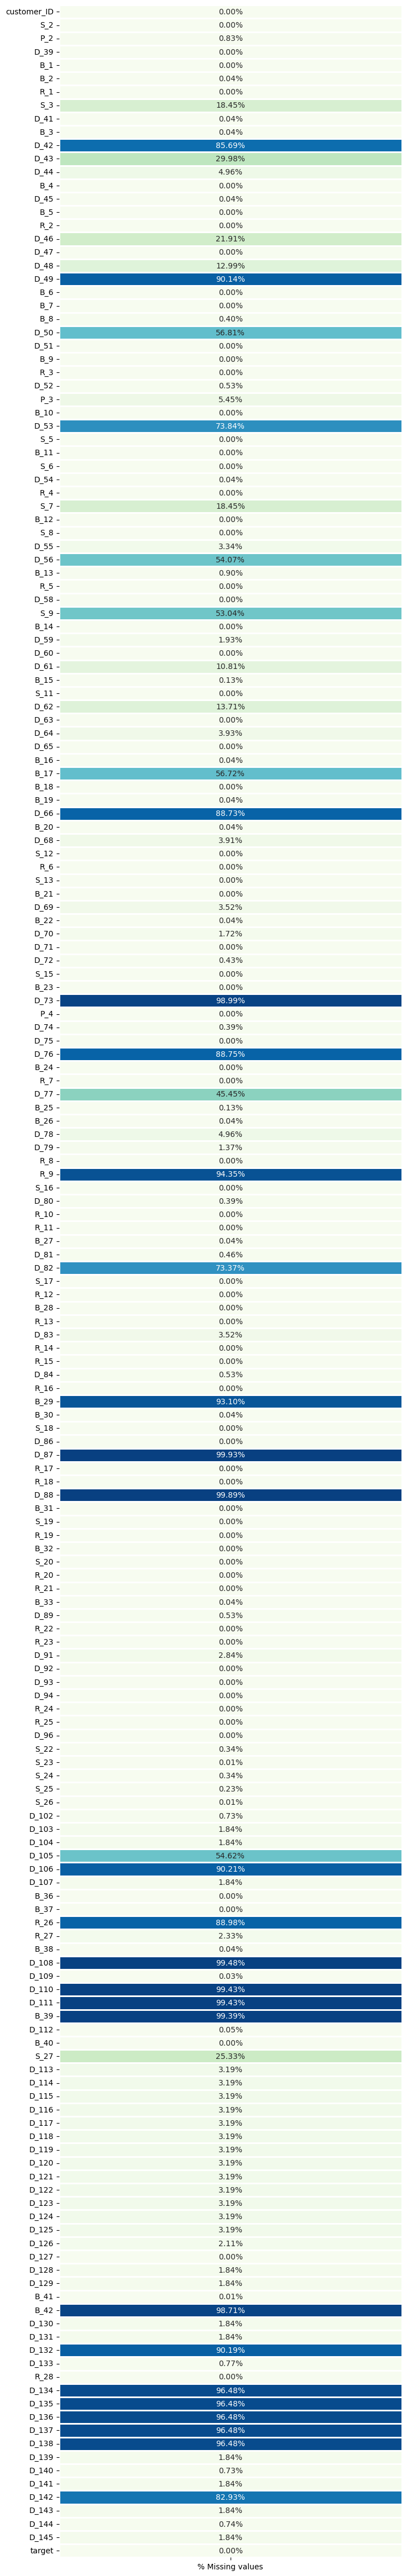

In [20]:
background_color = 'white'
missing = pd.DataFrame(columns = ['% Missing values'],data = train.isnull().sum()/len(train))
fig = plt.figure(figsize = (20, 60),facecolor=background_color)
gs = fig.add_gridspec(1, 2)
gs.update(wspace = 0.5, hspace = 0.5)
ax0 = fig.add_subplot(gs[0, 0])
for s in ["right", "top","bottom","left"]:
    ax0.spines[s].set_visible(False)
sns.heatmap(missing,cbar = False,annot = True,fmt =".2%", linewidths = 2,cmap = 'GnBu',vmax = 1, ax = ax0)
plt.show()

In [23]:
target_class = pd.DataFrame({'count': train.target.value_counts(),
                             'percentage': train['target'].value_counts() / train.shape[0] * 100
})

In [24]:
target_class

,count,percentage
0,4153582,75.090279
1,1377869,24.909721


In [25]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Pie(values = target_class['count'],labels = target_class.index,hole = 0.6, 
                     hoverinfo ='label+percent'))
fig.update_traces(textfont_size = 12, hoverinfo ='label+percent',textinfo ='label', 
                  showlegend = False,marker = dict(colors =["green","brown"]),
                  title = dict(text = 'Target Distribution'))  
fig.show()

In [26]:
del_cols = [c for c in train.columns if (c.startswith(('D','t'))) & (c not in cat_cols)]
df_del = train[del_cols]
spd_cols = [c for c in train.columns if (c.startswith(('S','t'))) & (c not in cat_cols)]
df_spd = train[spd_cols]
pay_cols = [c for c in train.columns if (c.startswith(('P','t'))) & (c not in cat_cols)]
df_pay = train[pay_cols]
bal_cols = [c for c in train.columns if (c.startswith(('B','t'))) & (c not in cat_cols)]
df_bal = train[bal_cols]
ris_cols = [c for c in train.columns if (c.startswith(('R','t'))) & (c not in cat_cols)]
df_ris = train[ris_cols]

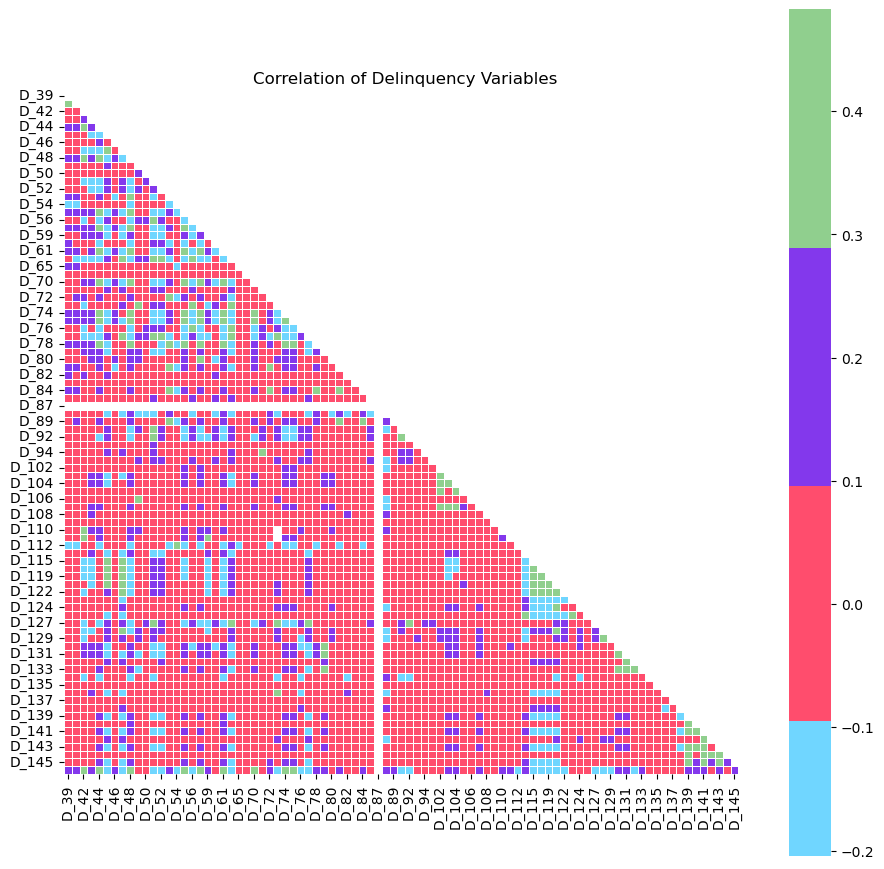

In [27]:
plt.figure(figsize =(11,11))
corr = df_del.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, robust = True, center = 0,square = True, linewidths =.6, cmap = custom_colors)
plt.title('Correlation of Delinquency Variables')
plt.show()

In [29]:
S_cols = [c for c in train.columns if (c.startswith(('S')))]
df_S = train[S_cols]

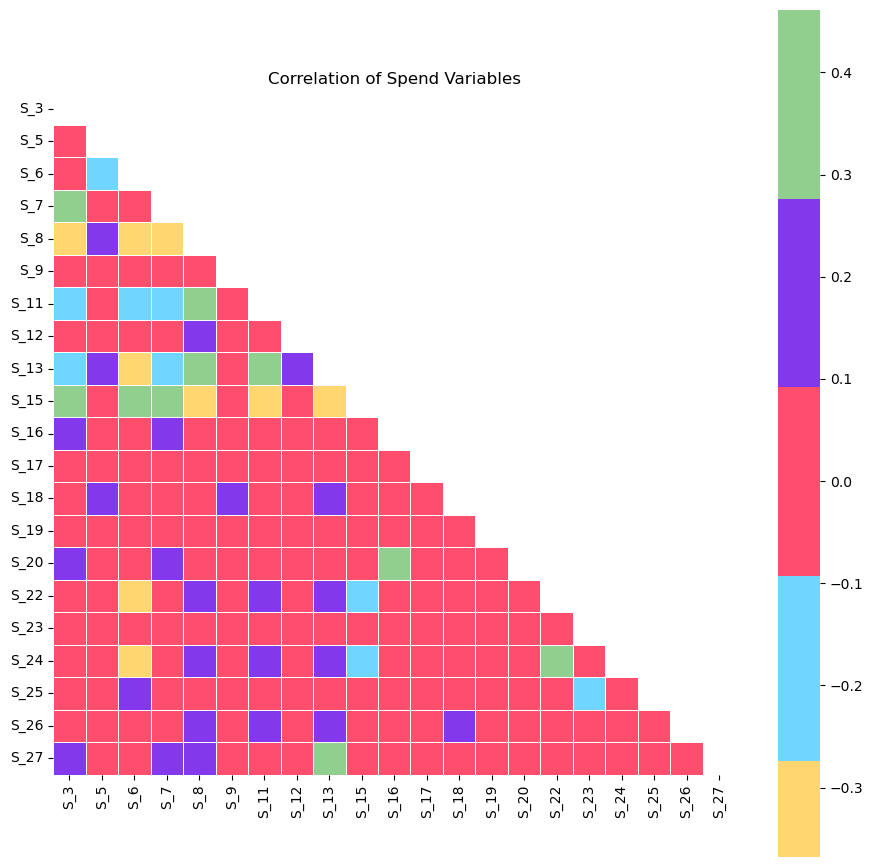

In [30]:
plt.figure(figsize = (11,11))
corr = df_S.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask = mask, robust = True, center = 0,square = True, linewidths = .6, cmap = custom_colors)
plt.title('Correlation of Spend Variables')
plt.show()

In [31]:
P_cols = [c for c in train.columns if (c.startswith(('P')))]
df_P = train[P_cols]

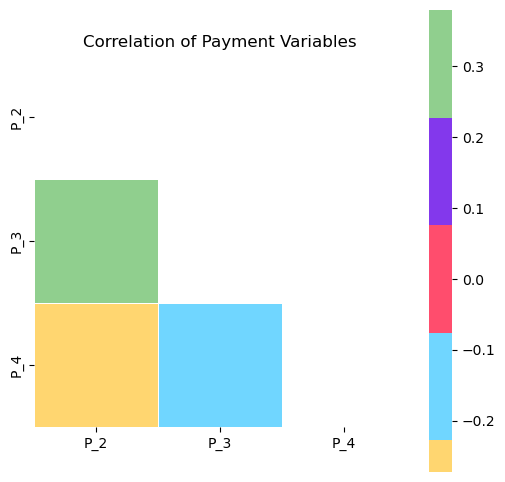

In [32]:
plt.figure(figsize = (6,6))
corr = df_P.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, robust = True, center = 0,square = True, linewidths = .6, cmap = custom_colors)
plt.title('Correlation of Payment Variables')
plt.show()

In [33]:
B_cols = [c for c in train.columns if (c.startswith(('B')))]
df_B = train[B_cols]

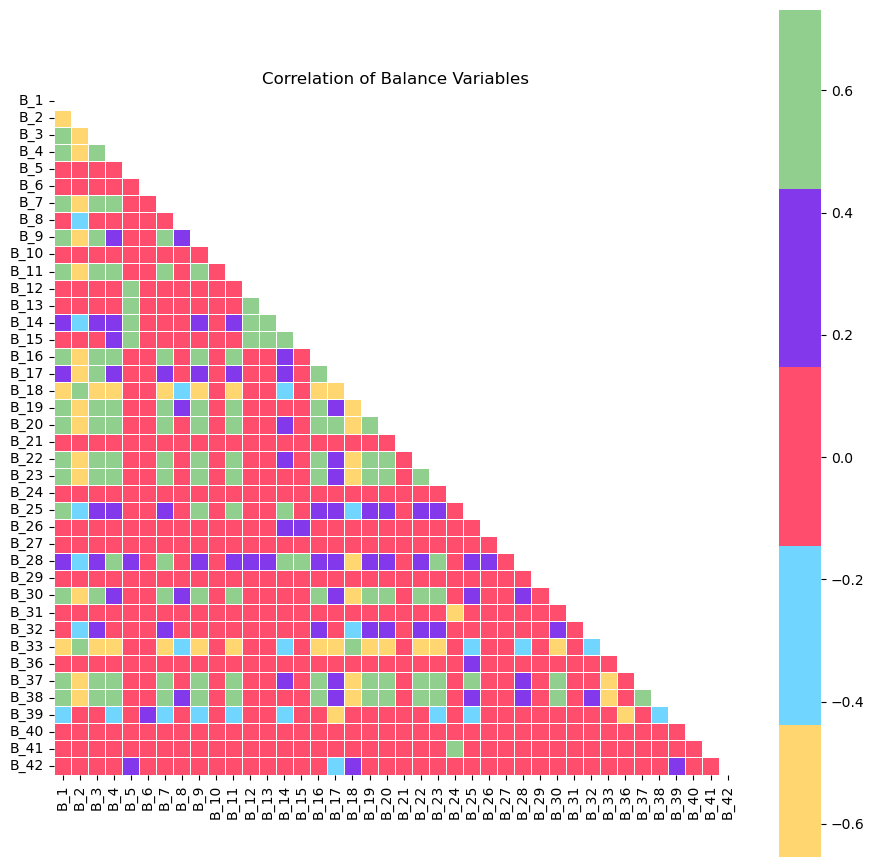

In [34]:
plt.figure(figsize = (11,11))
corr = df_B.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, robust=True, center = 0,square = True, linewidths =.6, cmap = custom_colors)
plt.title('Correlation of Balance Variables')
plt.show()

In [35]:
R_cols = [c for c in train.columns if (c.startswith(('R')))]
df_R = train[R_cols]

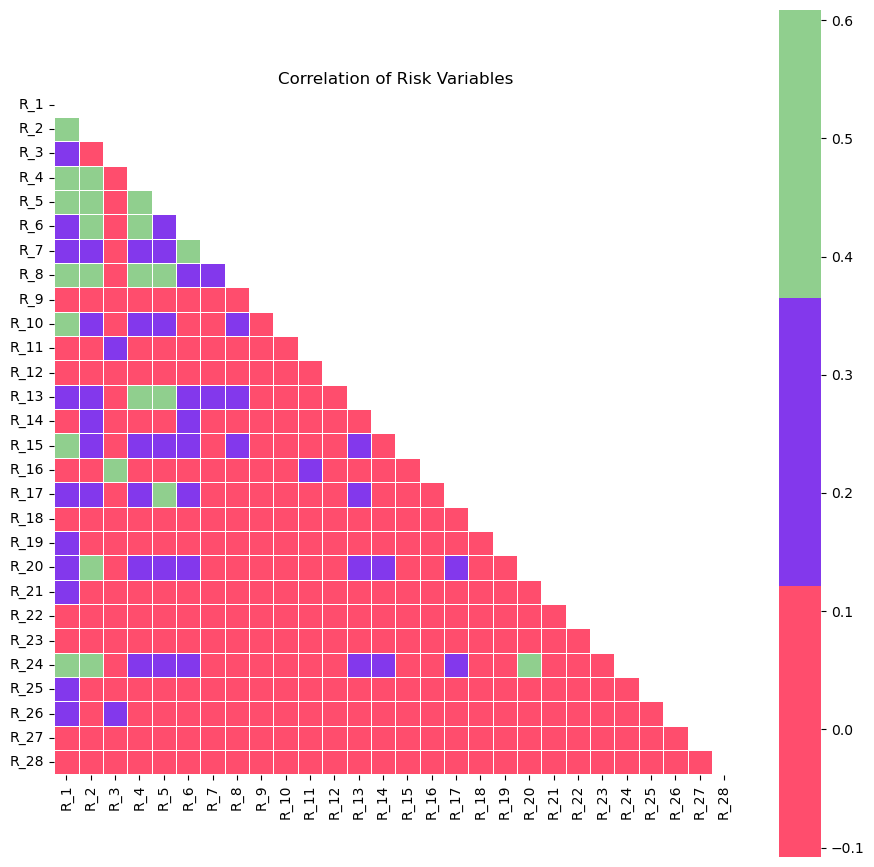

In [36]:
plt.figure(figsize=(11,11))
corr = df_R.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask = mask, robust = True, center = 0, square = True, linewidths =.6, cmap = custom_colors)
plt.title('Correlation of Risk Variables')
plt.show()

In [37]:
palette = cycle(["green","white","blue","yellow","purple"])
targ = train.corrwith(train['target'], axis=0)
val = [str(round(v ,1) *100) + '%' for v in targ.values]
fig = go.Figure()
fig.add_trace(go.Bar(y=targ.index, x= targ.values, orientation='h',text = val, marker_color = next(palette)))
fig.update_layout(title = "Correlation of variables with Target",width = 750, height = 3500,
                  paper_bgcolor='rgb(0,0,0,0)',plot_bgcolor='rgb(0,0,0,0)')

In [38]:
# remove coloumn if there are >50% of missing values.
#Given that there are many columns with large number of missing values, it is impractical to go through every single one of them to determine whether it is useful. 
#Furthermore, we do not have information on the feature (e.g. actual name of the feature) except the type of variable
#thus a practical option to drop out columns with too many missing values.

#delete the columns that contains either 50% or more than 50% of NaN values

perc = 50.0 # 50 %
min_count =  int(((100-perc)/100)*len(train))
train = train.dropna( axis=1, 
                thresh=min_count)

In [39]:
train.shape
# Now we are left with 161 column

(5531451, 161)

In [40]:
# There are multiple transactions. Lets take only the latest transaction from each customer.
# Latest transaction may have missing values, we will perform forward fill for those missing values.
# We perform forward fill as the last known value is likely to be brought forward to the next transaction.
# We then do a backfill if the first row happens to be NA.

train = train.set_index(['customer_ID'])
train = train.ffill().bfill()
train = train.reset_index()
train = train.groupby('customer_ID').tail(1)
train = train.set_index(['customer_ID'])

# drop date column since it is not useful now.
train.drop(['S_2'],axis = 1,inplace = True)
# check number of rows again
train.shape

(458913, 159)

In [41]:
# now check again missing value
train.isnull().sum()

# there are no missing value


P_2       0
D_39      0
B_1       0
B_2       0
R_1       0
         ..
D_141     0
D_143     0
D_144     0
D_145     0
target    0
Length: 159, dtype: int64

In [42]:
# identify the column which are not numeric
train.select_dtypes(['object'])

# D_63 and D_64 

,D_63,D_64
customer_ID,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,CR,O
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,CO,O
00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1,CO,R
000041bdba6ecadd89a52d11886e8eaaec9325906c9723355abb5ca523658edc,CO,O
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad51ca8b8c4a24cefed,CO,O
...,...,...
ffff41c8a52833b56430603969b9ca48d208e7c192c6a4081a6acc28cf4f8af7,CO,U
ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fdd3e5b57cfcbee30286,CO,R
ffff9984b999fccb2b6127635ed0736dda94e544e67e026eee4d20f680639ff6,CO,U


In [43]:
# since we require numeric values.
# we will perform one-hot encoding for D_63 and D_64
# and drop column D_63 and D_64 subsequently

train_D63 = pd.get_dummies(train[['D_63']])
train = pd.concat([train,train_D63],axis = 1)
train = train.drop(['D_63'],axis = 1)

train_D64 = pd.get_dummies(train[['D_64']])
train = pd.concat([train,train_D64],axis = 1)
train = train.drop(['D_64'],axis = 1)

In [44]:
# check for the column
train.columns

# we have 168 column including target
# we need to reduce dimensionality of the data


Index(['P_2', 'D_39', 'B_1', 'B_2', 'R_1', 'S_3', 'D_41', 'B_3', 'D_43',
       'D_44',
       ...
       'D_63_CL', 'D_63_CO', 'D_63_CR', 'D_63_XL', 'D_63_XM', 'D_63_XZ',
       'D_64_-1', 'D_64_O', 'D_64_R', 'D_64_U'],
      dtype='object', length=167)

In [45]:
train.head()

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_43,D_44,...,D_63_CL,D_63_CO,D_63_CR,D_63_XL,D_63_XM,D_63_XZ,D_64_-1,D_64_O,D_64_R,D_64_U
customer_ID,,,,,,,,,,,,,,,,,,,,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0.934745,0.009119,0.009382,1.007647,0.006104,0.135021,0.001604,0.007174,0.525600,0.003258,...,0,0,1,0,0,0,0,1,0,0
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,0.880519,0.178126,0.034684,1.004028,0.006911,0.165509,0.005552,0.005068,0.060646,0.008781,...,0,1,0,0,0,0,0,1,0,0
00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1,0.880875,0.009704,0.004284,0.812649,0.006450,0.165509,0.003796,0.007196,0.060646,0.000628,...,0,1,0,0,0,0,0,0,1,0
000041bdba6ecadd89a52d11886e8eaaec9325906c9723355abb5ca523658edc,0.621776,0.001083,0.012564,1.006183,0.007829,0.287766,0.004532,0.009937,0.046104,0.007792,...,0,1,0,0,0,0,0,1,0,0
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad51ca8b8c4a24cefed,0.871900,0.005573,0.007679,0.815746,0.001247,0.176403,0.000231,0.005528,0.044671,0.002436,...,0,1,0,0,0,0,0,1,0,0


In [46]:
train.shape

(458913, 167)

In [47]:
# We shall remove highly correlated features

train_without_target=train.drop(['target'],axis=1)
cor_matrix = train_without_target.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))

#Drop out columns with absolute correlation of more than 90%

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]
train_drop_highcorr=train.drop(to_drop,axis=1)
train_drop_highcorr.shape

#We are now left with 153 columns, which is still significant

(458913, 153)

In [48]:
# remove columns with low variance=0.1. Keep only columns with high variance
from sklearn.feature_selection import VarianceThreshold
from itertools import compress

def fs_variance(df, threshold:float=0.1):
    """
    Return a list of selected variables based on the threshold.
    """
    # The list of columns in the data frame
    features = list(df.columns)
    
    # Initialize and fit the method
    vt = VarianceThreshold(threshold = threshold)
    _ = vt.fit(df)
    
    # Get which column names which pass the threshold
    feat_select = list(compress(features, vt.get_support()))
    
    return feat_select
columns_to_keep=fs_variance(train_drop_highcorr)
# We are left with 58 columns (excluding target), which passed the threshold.
train_final=train[columns_to_keep]
len(columns_to_keep)

58

In [49]:
train_final.shape


(458913, 58)

In [50]:
train_final.to_csv("train_final.csv",index=True)

In [51]:
tt=pd.read_csv("/kaggle/working/train_final.csv")

In [52]:
tt.head()

,customer_ID,D_39,B_2,B_5,D_48,B_6,B_8,B_10,S_5,S_6,...,D_128,D_129,D_130,D_139,target,D_63_CO,D_63_CR,D_64_O,D_64_R,D_64_U
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.009119,1.007647,0.231717,0.192376,0.149564,0.002927,0.326101,0.034643,0.001770,...,0.999737,1.008523,0.004186,0.007186,0,0,1,1,0,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0.178126,1.004028,0.027000,0.014696,0.167634,0.000974,0.297130,0.043929,0.002911,...,0.999252,0.001777,0.002202,0.002980,0,1,0,1,0,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0.009704,0.812650,0.001557,0.080370,0.183628,0.000247,0.296313,0.001824,1.002366,...,0.008331,0.004189,0.002654,0.007383,0,1,0,0,1,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0.001083,1.006183,0.118818,0.013057,0.174331,1.005561,0.411625,0.022970,0.001113,...,1.002652,1.001869,0.000060,0.002704,0,1,0,1,0,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0.005573,0.815746,0.004855,0.325121,0.048857,1.005185,0.125195,0.009350,1.007410,...,1.006172,1.008584,1.006119,0.002974,0,1,0,1,0,0


In [53]:
#Split the target into y. Remove target from x.
y_train=train_final['target']
x_train=train_final.drop(['target'],axis=1)

In [54]:
# Split train data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score  
from sklearn.metrics import precision_score                         
from sklearn.metrics import recall_score
x_train_split, x_test_split, y_train_split, y_test_split = train_test_split(x_train, y_train, test_size=0.25, random_state=26)